<a href="https://colab.research.google.com/github/margotbrady/DS-1002/blob/main/Copy_of_06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [2]:
import pandas as pd
import numpy as np

---

In [3]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [4]:
series = pd.Series(list)
print(series)

0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [5]:
# Here, the np.arange function creates an array that starts at 2, and increases by 3 until it reaches 3 times the length of the list (5*3 = 15). The array is then assigned to the index.
series.index=np.arange(2,len(list)*3,step=3)
print(series)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [6]:
#Creates a dictionary with "names", "ages", "careers" as the keys, and the actual values are the names, ages, and careers.
dict = {
    'names': ['Jane','Margot','Ishita','Naomi'],
    'ages': [31,19,19,20],
    'careers':['Doctor','Student','Student','Student']
}
df=pd.DataFrame(dict)
print(df)


    names  ages  careers
0    Jane    31   Doctor
1  Margot    19  Student
2  Ishita    19  Student
3   Naomi    20  Student


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [7]:
df.index.name = "participant_id"
print(df)

                 names  ages  careers
participant_id                       
0                 Jane    31   Doctor
1               Margot    19  Student
2               Ishita    19  Student
3                Naomi    20  Student


6. Use a pandas function to determine the data types of the columns of `df`.

In [8]:
df.dtypes

names      object
ages        int64
careers    object
dtype: object

7. Using bracket notation, reference column `name`

In [9]:
df['names']

participant_id
0      Jane
1    Margot
2    Ishita
3     Naomi
Name: names, dtype: object

8. Using dot notation, reference column `name`

In [10]:
df.names

participant_id
0      Jane
1    Margot
2    Ishita
3     Naomi
Name: names, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [11]:
namesdf=pd.DataFrame(df.names)
print(namesdf)

                 names
participant_id        
0                 Jane
1               Margot
2               Ishita
3                Naomi


9. Show the 3rd element in column `career`.

In [12]:
# This references the second index, but the third element.
print(df.careers[2])

Student


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [13]:
import seaborn as sns
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [17]:
print(iris[['sepal_length','sepal_width']].corr())
print("The correlation between the variables sepal_length and sepal_width for all the irises is " + str(iris[['sepal_length','sepal_width']].corr().iloc[0,1]) )

              sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000
The correlation between the variables sepal_length and sepal_width for all the irises is -0.11756978413300088


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [18]:
# This creates a new dataframe for each species
setosadf=iris[iris.species=='setosa']
versicolordf=iris[iris.species=='versicolor']
virginicadf=iris[iris.species=='virginica']

# This prints out the correlation between sepal_length and sepal_width by using the corr function.
print("Setosa Correlation: " + "\n" + str(setosadf[['sepal_length','sepal_width']].corr())+ "\n")
print("Versicolor Correlation: " + "\n" + str(versicolordf[['sepal_length','sepal_width']].corr())+ "\n")
print("Virginica Correlation: "+ "\n" + str(virginicadf[['sepal_length','sepal_width']].corr())+ "\n")

#This finds the highest correlation through the max function. The .iloc function finds the position in the correlation (column 1, row 2)
# where the correlation is for each species, and the max function finds the max value between all of them.
highestcorr=max(setosadf[['sepal_length','sepal_width']].corr().iloc[0,1],virginicadf[['sepal_length','sepal_width']].corr().iloc[0,1] , versicolordf[['sepal_length','sepal_width']].corr().iloc[0,1])


# Here I created a function to determine which species has the highest correlation, instead of doing it manually by printing the correlations and looking at
# all of them individually
def findhighcorr(maxcorr):
  max = False
  if versicolordf[['sepal_length','sepal_width']].corr().iloc[0,1] == maxcorr:
    print("Versicolor has the highest correlation of " +str(maxcorr) + " between sepal length and sepal width.")
  elif virginicadf[['sepal_length','sepal_width']].corr().iloc[0,1]== maxcorr:
    print("Virginica has the highest correlation of " +str(maxcorr) + " between sepal length and sepal width.")
  else:
    print("Setosa has the highest correlation of " +str(maxcorr) + " between sepal length and sepal width.")

# Here i call the function and use the highest correlation value I determined earlier
findhighcorr(highestcorr)



Setosa Correlation: 
              sepal_length  sepal_width
sepal_length      1.000000     0.742547
sepal_width       0.742547     1.000000

Versicolor Correlation: 
              sepal_length  sepal_width
sepal_length      1.000000     0.525911
sepal_width       0.525911     1.000000

Virginica Correlation: 
              sepal_length  sepal_width
sepal_length      1.000000     0.457228
sepal_width       0.457228     1.000000

Setosa has the highest correlation of 0.7425466856651594 between sepal length and sepal width.


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative correlation?  Again, include calculations to support your answer.

In [19]:
# Here is the overall correlation for the dataframe iris
overallcorr = iris.corr(numeric_only=True)
print("Overall Correlation: " + "\n"+ str(overallcorr)+"\n")
# This unstacks the dataframe so I can use the min function to calculate the lowest correlation
overallmincorr = iris.corr(numeric_only=True).unstack().min()
# .idxmin() allows me to find the actual variables associated with the min value. I reference the first index because otherwise the result from the function is (sepal_length,petal_length).
print("The two variables that are most negatively correlated overall are "+overallcorr.unstack().idxmin()[0]+" and "+overallcorr.unstack().idxmin()[1]+" with a correlation of "+str(overallmincorr)+"\n")
#Here I add an index so I can separate by species
iris.index.name = 'obs_id'
iriswindx=iris.reset_index().set_index(['species','obs_id'])

# This creates a new list of each type of species
specieslist = (iris.species.unique())

# For each species in the list, it will calculate the correlation for the variables.
for species in specieslist:
  #Creates a new dataframe for each species correlation
  speciescorr = iriswindx.loc[species].corr()
  print("Correlation for " + species +": \n")
  print(str(speciescorr)+"\n")
  # This unstacks the dataframe so I can use the min function to calculate the lowest correlation
  mincorr = speciescorr.unstack().min()
  print("The two variables that are least positively correlated are "+speciescorr.unstack().idxmin()[0]+" and "+speciescorr.unstack().idxmin()[1]+" with a correlation of "+str(mincorr)+"\n")

Overall Correlation: 
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

The two variables that are most negatively correlated overall are sepal_width and petal_length with a correlation of -0.42844010433053864

Correlation for setosa: 

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.742547      0.267176     0.278098
sepal_width       0.742547     1.000000      0.177700     0.232752
petal_length      0.267176     0.177700      1.000000     0.331630
petal_width       0.278098     0.232752      0.331630     1.000000

The two variables that are least positively correlated are sepal_width and petal_length with a correlation of 0.1776999667822706

Correlation

14. Once again, the variables sepal_width and petal_length are negatively correlated. But for each individual species, these two variables are positively correlated. How is this possible? Explain this phenomenon. Use a data visualization if it helps.

Overall, we can see a negative correlation between petal_length and sepal_width.


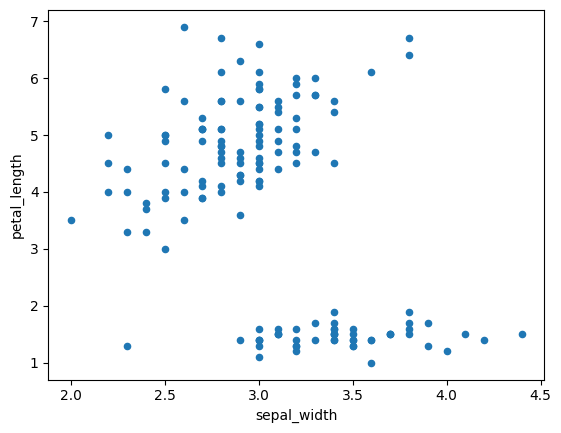

In [ ]:
# Here we can see the overall correlation between sepal_width and petal_length
iris.plot.scatter('sepal_width','petal_length')
print("Overall, we can see a negative correlation between petal_length and sepal_width.")

 However, when we color the points by species, we see a different story. 
 Certain species are plotted in different parts of the graph, but by color, we see a positive slope for each species. 
 While some species are generally in the bottom right portion of the graph, and some are in the top left portion, we see a positive correlation for all three species.


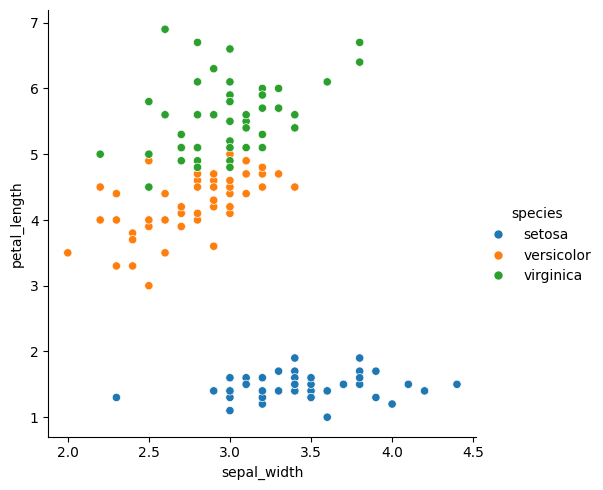

In [ ]:
# This uses seasborn to create a scatterplot while coloring for species
sns.relplot(iris,x='sepal_width',y='petal_length',hue = 'species')
print(" However, when we color the points by species, we see a different story. \n Certain species are plotted in different parts of the graph, but by color, we see a positive slope for each species. \n While some species are generally in the bottom right portion of the graph, and some are in the top left portion, we see a positive correlation for all three species.")

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


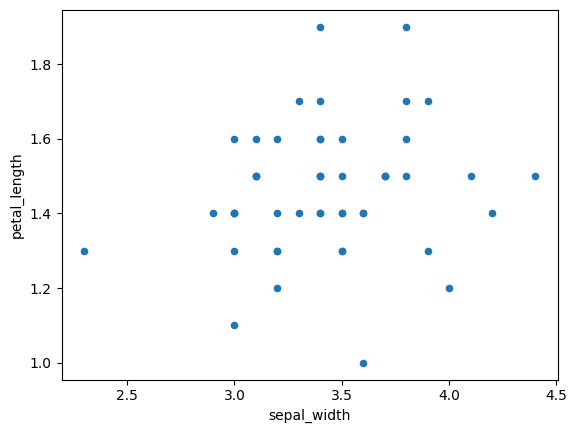

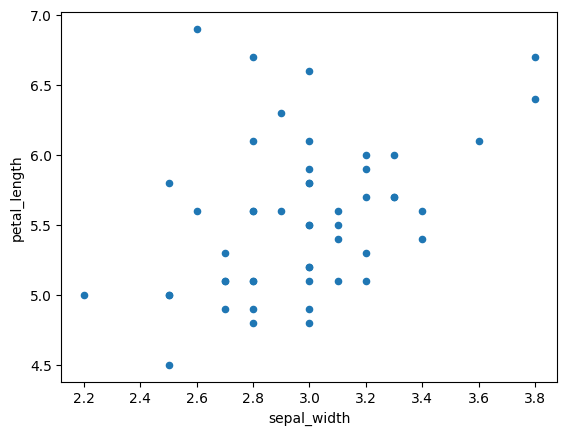

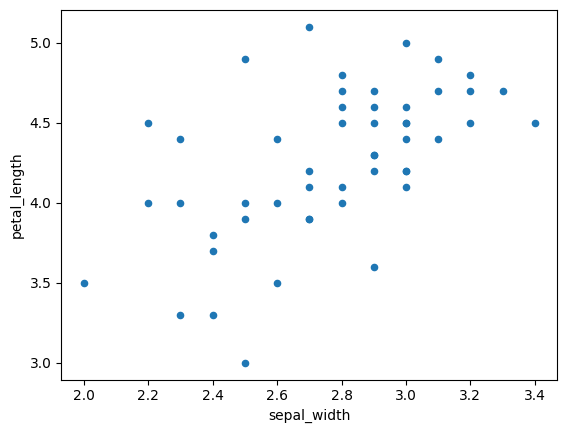

In [ ]:
#To further visualize, I can create three new graphs, for each species.
print(iris[iris.species == 'setosa'].plot.scatter('sepal_width','petal_length'))
print(iris[iris.species == 'virginica'].plot.scatter('sepal_width','petal_length'))
print(iris[iris.species == 'versicolor'].plot.scatter('sepal_width','petal_length'))